# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Gazell Arrafi Asmara
- **Email:** rarzgamers@gmail.com
- **ID Dicoding:** HazelNut

## Menentukan Pertanyaan Bisnis

- Jam berapa yang mencatatkan jumlah penyewaan sepeda terbanyak dan terendah?
- Pada jam berapa saja terjadinya lonjakan kenaikan penyewaan sepeda?
- Hari apa yang memiliki jumlah penyewaan sepeda tertinggi?
- Musim apa yang memiliki jumlah penyewaan sepeda tertinggi?
- Berapa banyak orang yang menjadi 'registered' dibandingkan dengan 'casual' dalam hal penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [3]:
#Membaca data hari dan jam
day_df = pd.read_csv('/content/drive/MyDrive/archive/day.csv')
hour_df = pd.read_csv('/content/drive/MyDrive/archive/hour.csv')

In [4]:
#Menampilkan 5 data teratas dari data hari
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
#Menampilkan 5 data teratas dari data jam
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


=========================================
####Dataset characteristics
=========================================
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


### Assessing Data

In [6]:
#Melakukan cek terhadap tipe data yang ada di data day dan hour
print("----Info Data Day----")
day_df.info()
print("\n----Info Data Hour----")
hour_df.info()

----Info Data Day----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

----Info Data Hour----
<class 'pandas.core.frame.DataFrame'>
RangeInde

In [7]:
#Cek data kosong di data hari
print("----Data Koto Data Day----")
day_df.isna().sum()

----Data Koto Data Day----


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
#Cek nilai kosong di data hour
print("----Data Kosong Data Hour----")
hour_df.isna().sum()

----Data Kosong Data Hour----


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [9]:
#Cek duplikasi yang ada di data day dan hour
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [10]:
#Cek statistik dari kolom pada data day
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [11]:
#Cek statistik dari kolom pada data hour
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Cleaning Data

#####Drop

In [12]:
#Menghapus kolom instant dan workingday
hour_df.drop(['workingday'], axis = 1, inplace= True)
day_df.drop(['workingday'], axis = 1, inplace= True)

#####Ubah tipe data

In [13]:
#Melakukan perubahan tipe data dteday
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [14]:
#Melakukan perubahan tipe data pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit'
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

#####Mengubah nama kolom

In [15]:
#Mengganti nama kolom agar lebih mudah dibaca di dataset day_df
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'a_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [16]:
#Mengganti nama kolom agar lebih mudah dibaca di dataset hour_df
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'a_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [17]:
#Konversi season
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

day_df['season'] = day_df['season'].map(season_mapping)
hour_df['season'] = hour_df['season'].map(season_mapping)

In [18]:
#Konversi month
month_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

day_df['month'] = day_df['month'].map(month_mapping)
hour_df['month'] = hour_df['month'].map(month_mapping)

In [19]:
#Konversi weather
weather_mapping = {
    1: 'Clear',
    2: 'Misty',
    3: 'Light_Rainsnow',
    4: 'Heavy_Rainsnow'
}

day_df['weather_situation'] = day_df['weather_situation'].map(weather_mapping)
hour_df['weather_situation'] = hour_df['weather_situation'].map(weather_mapping)

In [20]:
#Konversi day
day_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thrusday',
    5: 'Friday',
    6: 'Saturday'
}

day_df['a_week'] = day_df['a_week'].map(day_mapping)
hour_df['a_week'] = hour_df['a_week'].map(day_mapping)

In [21]:
#Konversi year
year_mapping = {
    0: '2011',
    1: '2012'
}

day_df['year'] = day_df['year'].map(year_mapping)
hour_df['year'] = hour_df['year'].map(year_mapping)

In [22]:
day_df.head()

,instant,dteday,season,year,month,holiday,a_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Monday,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#####Perubahan terhadap nilai

In [23]:
#Melakukan perhitungan terhadap beberapa nilai agar nilainya menjadi bulat
day_df['humidity'] = day_df['humidity']*100
day_df['temp'] = day_df['temp']*41
day_df['atemp'] = day_df['atemp']*50
day_df['wind_speed'] = day_df['wind_speed']*67

hour_df['humidity'] = hour_df['humidity']*100
hour_df['temp'] = hour_df['temp']*41
hour_df['atemp'] = hour_df['atemp']*50
hour_df['wind_speed'] = hour_df['wind_speed']*67

#####Penambahan kolom

In [24]:
#Melakukan cek terhadap hari untuk menentukan apakah week day/end
weekend_days = {"Saturday", "Sunday"}

def categorize_day(day):
    return "weekend" if day in weekend_days else "weekdays"

day_df["category_days"] = day_df["a_week"].apply(categorize_day)
hour_df["category_days"] = hour_df["a_week"].apply(categorize_day)

In [25]:
#Melakukan cek terhadap kelembapan untuk menenukan apakah kering/lembab/ideal
def humidity_class(humidity):
    if humidity < 45:
        return "Kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Lembab"

day_df["humidity_category"] = day_df["humidity"].apply(humidity_class)
hour_df["humidity_category"] = hour_df["humidity"].apply(humidity_class)

#####Cek data untuk melihat data baru

In [26]:
day_df.head()

,instant,dteday,season,year,month,holiday,a_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985,weekend,Lembab
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801,weekend,Lembab
2,3,2011-01-03,Spring,2011,Jan,0,Monday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,weekdays,Kering
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,weekdays,Ideal
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,weekdays,Kering


In [27]:
hour_df.head()

,instant,dteday,season,year,month,hours,holiday,a_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
0,1,2011-01-01,Spring,2011,Jan,0,0,Saturday,Clear,9.84,14.395,81.0,0.0,3,13,16,weekend,Lembab
1,2,2011-01-01,Spring,2011,Jan,1,0,Saturday,Clear,9.02,13.635,80.0,0.0,8,32,40,weekend,Lembab
2,3,2011-01-01,Spring,2011,Jan,2,0,Saturday,Clear,9.02,13.635,80.0,0.0,5,27,32,weekend,Lembab
3,4,2011-01-01,Spring,2011,Jan,3,0,Saturday,Clear,9.84,14.395,75.0,0.0,3,10,13,weekend,Lembab
4,5,2011-01-01,Spring,2011,Jan,4,0,Saturday,Clear,9.84,14.395,75.0,0.0,0,1,1,weekend,Lembab


## Exploratory Data Analysis (EDA)

### Explore data day

In [28]:
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,a_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,NaN,NaN


#####Cek total data per season

In [29]:
day_df.groupby(by="season").count_cr.sum()

<ipython-input-29-5b713af0be45>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").count_cr.sum()


,count_cr
season,
Spring,471348
Summer,918589
Fall,1061129
Winter,841613


#####Cek total data pertahun antara registered dan casual

In [30]:
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


#####Hasil explore data day

Dapat dilihat jika pengguna yang sudah ter-registered jumlahnya selalu lebih banyak dibandingkan casual, di tahun 2011 pengguna yang sudah registered sebanyak 995851 sedangkan yang casual hanya 247252 (selisih sekitar 700 ribu) sedangkan pada tahun 2012 pengguna yang sudah registered sebanyayk 1676811 sedangkan yang casual hanya 372765.

### Explore data hour

In [31]:
hour_df.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,a_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Lembab
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000,NaN,NaN


#####Cek total data per season

In [32]:
hour_df.groupby(by="hours").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


#####Hasil explore data hour

Dapat dilihat bahwa jam dengan total penyewa terbanyak adalah di jam 17:00 dengan total penyewa sebanyak 336860 sedangkan jam dengan total penyewa terendah adalah jam 04:00 dengan total penyewa sebanyak 4428

## Visualization & Explanatory Analysis

###List pertanyaan
- Jam berapa yang mencatatkan jumlah penyewaan sepeda terbanyak dan terendah?
- Pada jam berapa saja terjadinya lonjakan kenaikan penyewaan sepeda?
- Hari apa yang memiliki jumlah penyewaan sepeda tertinggi?
- Musim apa yang memiliki jumlah penyewaan sepeda tertinggi?
- Berapa banyak orang yang menjadi 'registered' dibandingkan dengan 'casual' dalam hal penyewaan sepeda?


### Pertanyaan 1: Jam berapa yang mencatatkan jumlah penyewaan sepeda terbanyak dan terendah?

####Grouping

In [33]:
sum_order_items_df2 = hour_df.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()

####Cek head dari variabel baru

In [34]:
sum_order_items_df2.head()

,hours,count_cr
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789


####Visualisasi

<ipython-input-35-f0f05e114d21>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hours", y="count_cr", data=sum_order_items_df2.head(5), palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax[0])
<ipython-input-35-f0f05e114d21>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hours", y="count_cr", data=sum_order_items_df2.sort_values(by="hours", ascending=True).head(5), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#90CAF9"], ax=ax[1])


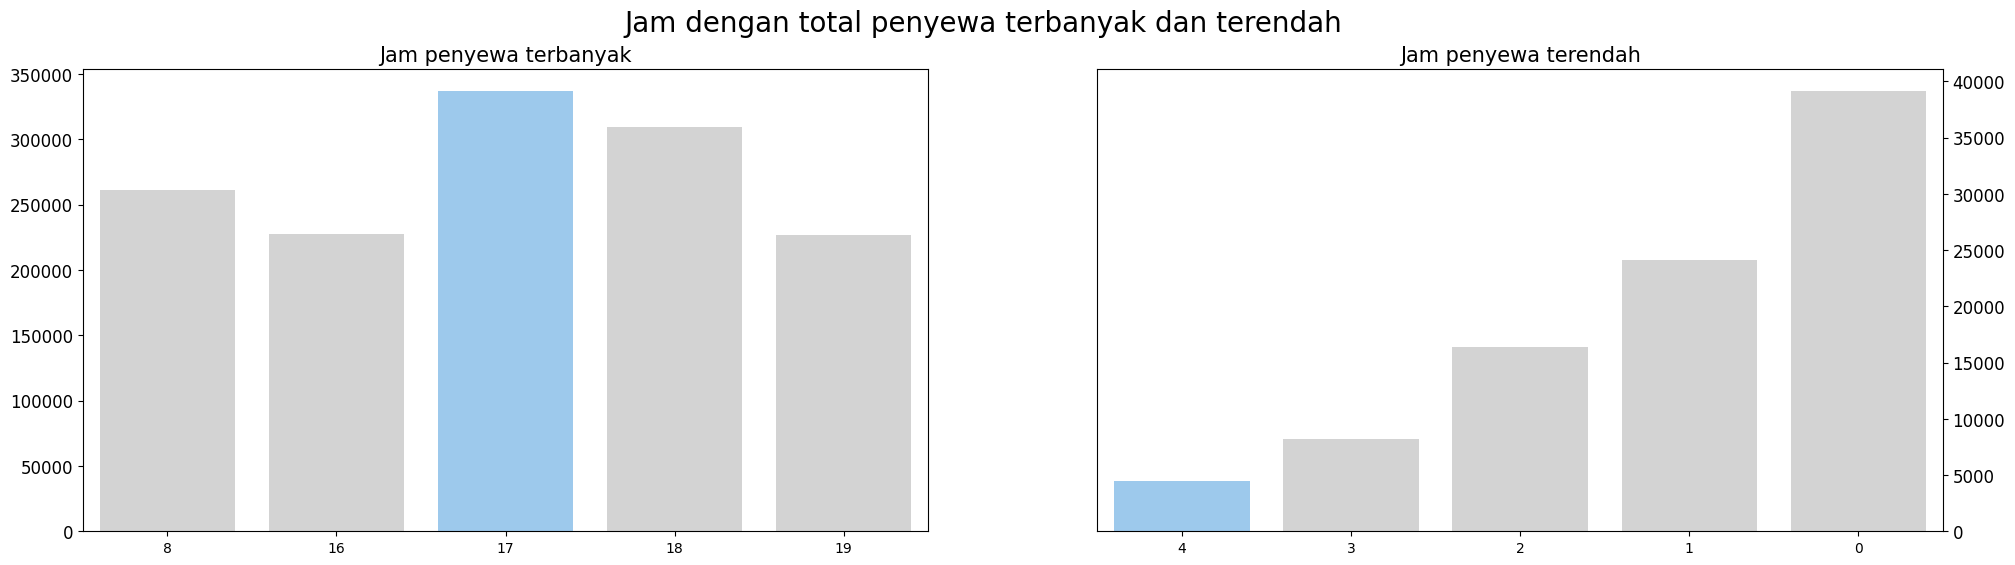

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

#Suplot pertama
sns.barplot(x="hours", y="count_cr", data=sum_order_items_df2.head(5), palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Jam penyewa terbanyak", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

#Suplot kedua
sns.barplot(x="hours", y="count_cr", data=sum_order_items_df2.sort_values(by="hours", ascending=True).head(5), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#90CAF9"], ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Jam penyewa terendah", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Jam dengan total penyewa terbanyak dan terendah", fontsize=20)
plt.show()


Dapat dilihat dari gambar diatas bahwa jam dengan total penyewa terbanyak adalah di jam 17:00 dengan total penyewa sebanyak 336860 sedangkan jam dengan total penyewa terendah adalah jam 04:00 dengan total penyewa sebanyak 4428

Dapat dilihat dari gambar diatas bahwa lonjakan kenaikan penyewaan sepeda terjadi pada jam 08:00 dan jam 17:00

### Pertanyaan 2: Pada jam berapa saja terjadinya lonjakan kenaikan penyewaan sepeda?

####Grouping

In [36]:
sum_order_items_df1 = hour_df.groupby("hours").agg({
    "casual": "sum",
    "registered": "sum",
    "count_cr": "sum"
})

####Cek head data variabel baru

In [37]:
sum_order_items_df1.head()

,casual,registered,count_cr
hours,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428


####Visualisasi

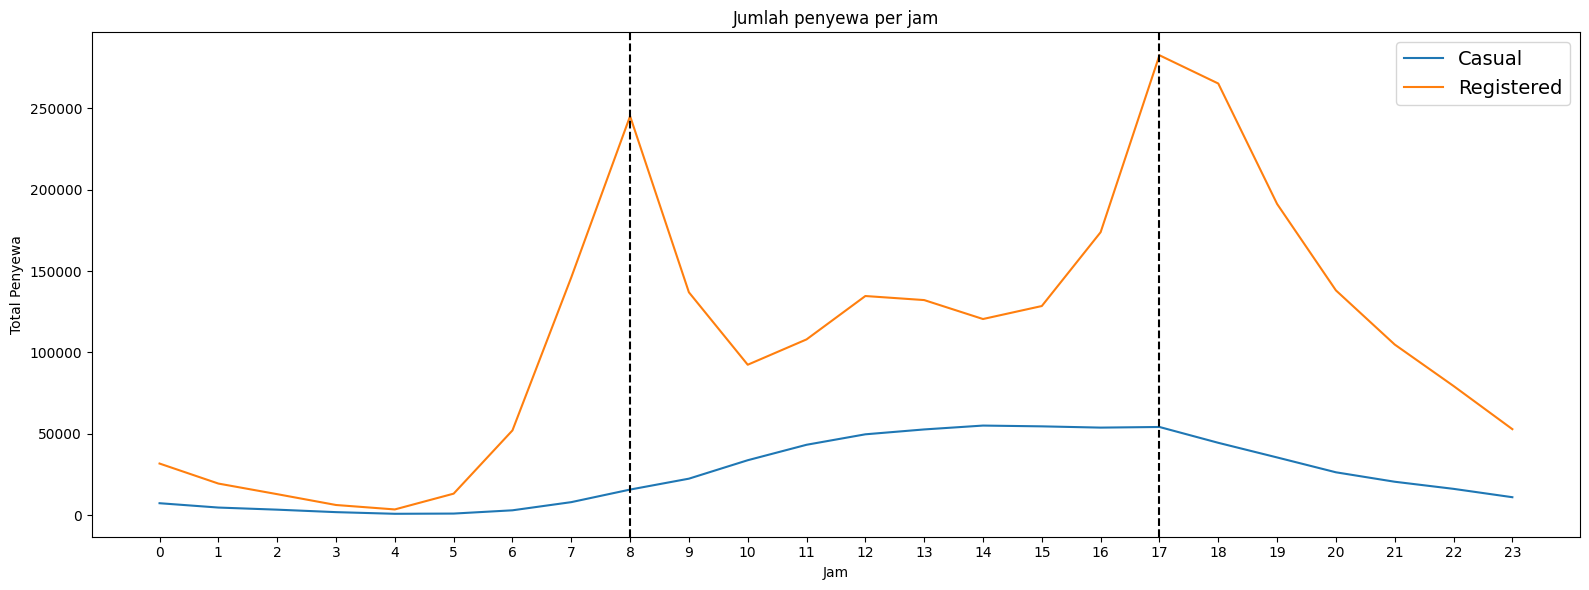

In [38]:
plt.figure(figsize=(16,6))

sns.lineplot(x="hours", y="casual", data=sum_order_items_df1, label='Casual')
sns.lineplot(x="hours", y="registered", data=sum_order_items_df1, label='Registered')

x = np.arange(0, 24, 1)
plt.xticks(x)

plt.axvline(x=8, color='black', linestyle='--')
plt.axvline(x=17, color='black', linestyle='--')
plt.legend(loc='upper right', fontsize=14)

plt.xlabel("Jam")
plt.ylabel("Total Penyewa")
plt.title("Jumlah penyewa per jam")

plt.tight_layout()
plt.show()

Dapat dilihat dari gambar diatas bahwa jam dengan lonjakan kenaikan penyewa sepeda pada jam 08:00 dan 17:00

### Pertanyaan 3: Hari apa yang memiliki jumlah penyewaan sepeda tertinggi?

####Grouping

In [39]:
daily_users_df = day_df.groupby(by="a_week").count_cr.sum().reset_index()
daily_order = ['Sunday','Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday']

<ipython-input-39-d7a4e404460f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_users_df = day_df.groupby(by="a_week").count_cr.sum().reset_index()


In [40]:
daily_users_df.head(7)

,a_week,count_cr
0,Sunday,444027
1,Monday,455503
2,Tuesday,469109
3,Wednesday,473048
4,Thrusday,485395
5,Friday,487790
6,Saturday,477807


####Visualisasi

<ipython-input-41-c2e035cf4824>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="a_week", y="count_cr", data=daily_users_df, palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#90CAF9", "#D3D3D3"], order=daily_order)


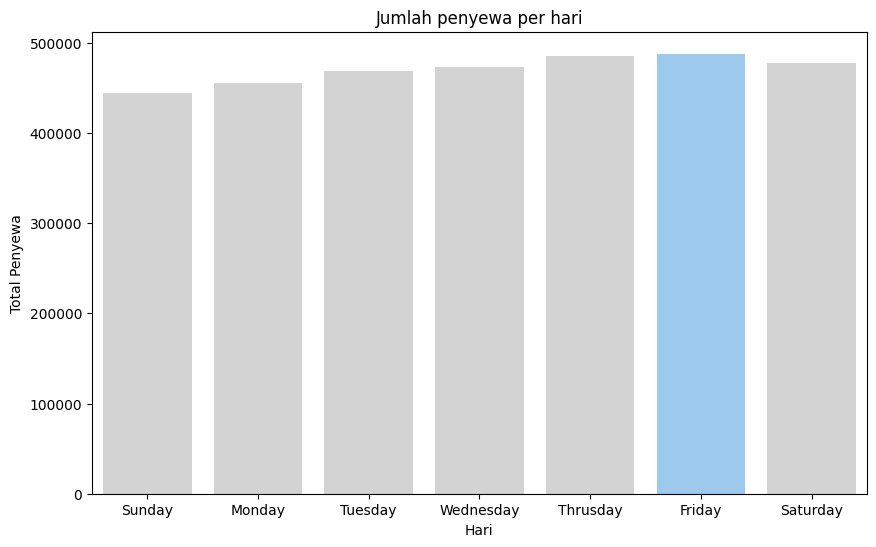

In [41]:
plt.figure(figsize=(10,6))

sns.barplot(x="a_week", y="count_cr", data=daily_users_df, palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#90CAF9", "#D3D3D3"], order=daily_order)

plt.xlabel("Hari")
plt.ylabel("Total Penyewa")
plt.title("Jumlah penyewa per hari")

plt.show()

Dapat dilihat dari gambar diatas bahwa hari dengan total penyewa terbanyak adalah di hari jumat dengan total penyewa sebanyak 487790 sedangkan musim dengan total penyewa terendah adalah musim spring dengan total penyewa sebanyak 444027

### Pertanyaan 4: Musim apa yang memiliki jumlah penyewaan sepeda tertinggi?

####Grouping

In [42]:
seasonly_users_df = day_df.groupby(by="season").count_cr.sum().reset_index()
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

<ipython-input-42-51bb2b159fb9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonly_users_df = day_df.groupby(by="season").count_cr.sum().reset_index()


####Visualisasi

<ipython-input-43-a0416b8ad53b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="count_cr", data=seasonly_users_df, palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3"], order=season_order)


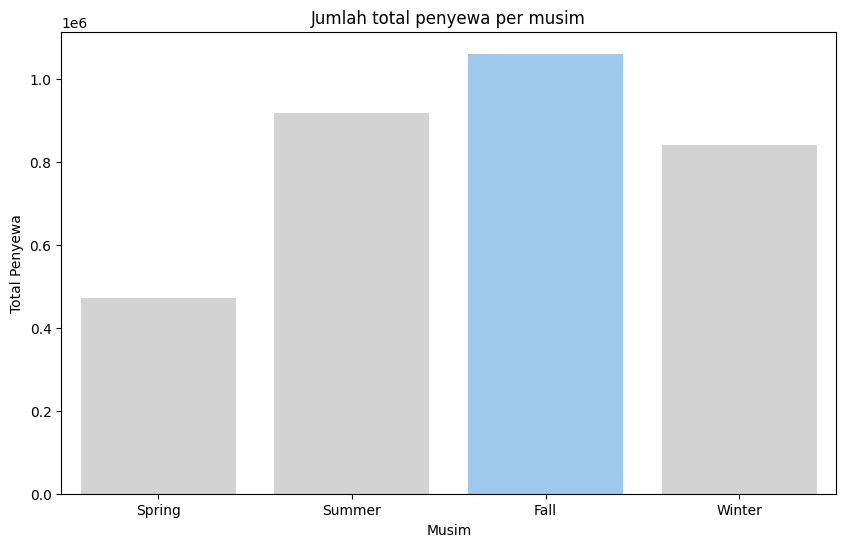

In [43]:
plt.figure(figsize=(10,6))

sns.barplot(x="season", y="count_cr", data=seasonly_users_df, palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3"], order=season_order)

plt.xlabel("Musim")
plt.ylabel("Total Penyewa")
plt.title("Jumlah total penyewa per musim")

plt.show()

Dapat dilihat dari gambar diatas bahwa musim dengan total penyewa terbanyak adalah di musim fall dengan total penyewa sebanyak 1061129 sedangkan musim dengan total penyewa terendah adalah musim spring dengan total penyewa sebanyak 471348

### Pertanyaan 5: Berapa banyak orang yang menjadi 'registered' dibandingkan dengan 'casual' dalam hal penyewaan sepeda?

####Visualisasi

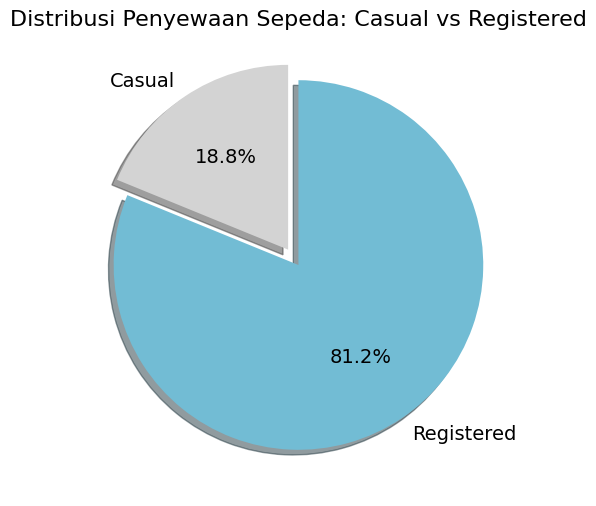

In [44]:
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']
colors = ["#D3D3D3", "#72BCD4"]
explode = (0.1, 0)

plt.figure(figsize=(6, 6))
plt.pie(data, explode=explode, labels=labels, autopct='%1.1f%%',
        colors=colors, shadow=True, startangle=90, textprops={'fontsize': 14})

plt.title('Distribusi Penyewaan Sepeda: Casual vs Registered', fontsize=16)
plt.show()

Dapat dilihat dari gambar diatas bahwa hari dengan total penyewa yang sudah registered sebanyak 81.2% sedangakn penyewa casual hanya 18.8%

###Convert PDF

In [45]:
day_df.to_csv("newDay_df.csv", index=False)

In [46]:
    hour_df.to_csv("newHour_df.csv", index=False)

## Conclusion

- Conclution pertanyaan 1: total penyewa terbanyak adalah di jam 17:00 dengan total penyewa sebanyak 336860 sedangkan jam dengan total penyewa terendah adalah jam 04:00 dengan total penyewa sebanyak 4428
- Conclution pertanyaan 2: jam dengan lonjakan kenaikan penyewa sepeda pada jam 08:00 dan 17:00
- Conclution pertanyaan 3: total penyewa terbanyak adalah di hari jumat dengan total penyewa sebanyak 487790 sedangkan musim dengan total penyewa terendah adalah musim spring dengan total penyewa sebanyak 444027
- Concluton pertanyaan 4: total penyewa terbanyak adalah di musim fall dengan total penyewa sebanyak 1061129 sedangkan musim dengan total penyewa terendah adalah musim spring dengan total penyewa sebanyak 471348
- Conlution pertanyaan 5: total penyewa yang sudah registered sebanyak 81.2% sedangakn penyewa casual hanya 18.8%